![Assimila logo](../../helpers/logosmall.png "Assimila")

In [3]:
import os
import sys
sys.path.append("../../helpers")

from data import Data
from maptools import MapTools
from widgets import Widgets

import datetime as dt

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [4]:
w = Widgets()
out = w.display_output()
d = Data(out)

Output()

## Assimila Data Cube Skin temperature data

In [5]:
product = 'era5'
subproduct = 'skt'
start = '2019-11-01'
end = '2020-01-31'

In [7]:
# Reading
lat, lon = 51.440872, -0.934287

era5_skt_reading = d.get_data_from_datacube_latlon(product, subproduct, start, end, lat, lon)

<IPython.core.display.Javascript object>


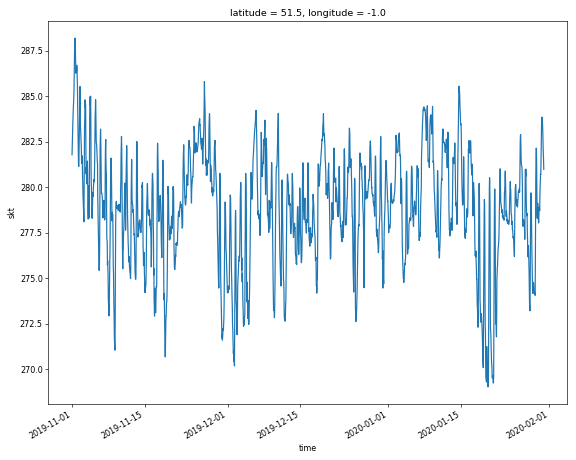

In [17]:
era5_skt_reading.skt.plot(figsize=(10,8))
plt.tight_layout()
plt.show()

In [18]:
# Central London
lat, lon = 51.507379, -0.127623

era5_skt_london = d.get_data_from_datacube_latlon(product, subproduct, start, end, lat, lon)

<IPython.core.display.Javascript object>


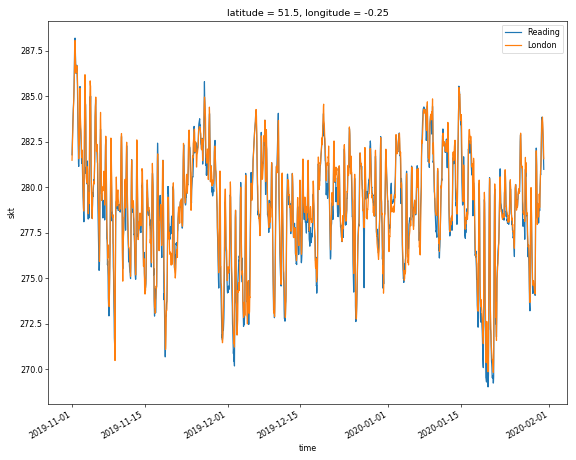

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

era5_skt_reading.skt.plot(ax=ax, label='Reading')
era5_skt_london.skt.plot(ax=ax, label='London')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
sys.path.append("../../")
from DQTools.DQTools.dataset import Dataset

# Get spatial and temporal subset

start = '2019-01-18'
end = '2020-01-21'


ds = Dataset(product=product, subproduct=subproduct)
north, east, south, west = 60.0, 3.2, 48.5, -11.0

subset = d.get_data_from_datacube_nesw(product, subproduct, north, east,
                                    south, west, start, end)

print(subset)

<xarray.Dataset>
Dimensions:    (latitude: 47, longitude: 57, time: 8833)
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 49.0 48.75 48.5
  * longitude  (longitude) float64 -11.0 -10.75 -10.5 -10.25 ... 2.5 2.75 3.0
  * time       (time) datetime64[ns] 2019-01-18 ... 2020-01-21
Data variables:
    skt        (time, latitude, longitude) float32 281.84 281.81 ... 271.9
Attributes:
    transform:      [-11.125, 0.25, 0.0, 60.125, 0.0, -0.25]
    crs:            +init=epsg:4326
    res:            (0.25, 0.25)
    is_tiled:       0
    AREA_OR_POINT:  Area
    product:        era5


<IPython.core.display.Javascript object>


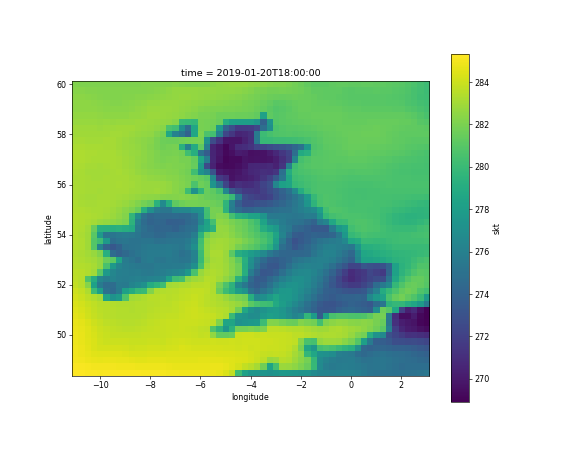

In [25]:
fig, bx = plt.subplots(figsize=(10,8))

subset.skt.sel(time='2019-01-20T18:05', method='nearest').plot.imshow(ax=bx)
bx.set_aspect('equal')
plt.show()